In [285]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import random
import time
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as LabelEndcoder 
import sklearn.preprocessing as PolynomialFeatures
import seaborn as sns
from xgboost import XGBRegressor
from sklearn import linear_model , tree
from sklearn.metrics import mean_squared_error , r2_score
from datetime import datetime 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from joblib import Parallel , delayed
from sklearn.pipeline import Pipeline
pd.set_option('display.max_columns',None)
sns.set(rc={'figure.figsize':(11.7 , 8.27)})



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx


In [288]:
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.io as pio
pio.renderers.default = 'iframe'
# If the dir has only one file this should work
filepath = [os.path.join(dirname, filename) for dirname, _, filenames in os.walk('/kaggle/input') for filename in filenames][0]

In [289]:
df = pd.read_excel(filepath, sheet_name="Transactions")
#df = pd.read_excel('/kaggle/input/coffee-shop-sales-dataset/Coffee Shop Sales.xlsx' , sheet_name='Transactions')

In [290]:
df.shape

(149116, 17)

In [291]:
df.head(1)#öncelikle df'in ilk satırını açtık

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,1,Jan,7,Sun,7


In [292]:
df.describe()

,transaction_id,transaction_date,transaction_qty,store_id,product_id,unit_price,Revenue,Month,Weekday,Hour
count,149116.000000,149116,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000,149116.000000
mean,74737.371872,2023-04-15 11:50:32.173609984,1.438276,5.342063,47.918607,3.382219,4.686367,3.988881,3.982336,11.735790
min,1.000000,2023-01-01 00:00:00,1.000000,3.000000,1.000000,0.800000,0.800000,1.000000,1.000000,6.000000
25%,37335.750000,2023-03-06 00:00:00,1.000000,3.000000,33.000000,2.500000,3.000000,3.000000,2.000000,9.000000
50%,74727.500000,2023-04-24 00:00:00,1.000000,5.000000,47.000000,3.000000,3.750000,4.000000,4.000000,11.000000
75%,112094.250000,2023-05-30 00:00:00,2.000000,8.000000,60.000000,3.750000,6.000000,5.000000,6.000000,15.000000
max,149456.000000,2023-06-30 00:00:00,8.000000,8.000000,87.000000,45.000000,360.000000,6.000000,7.000000,20.000000
std,43153.600016,NaN,0.542509,2.074241,17.930020,2.658723,4.227099,1.673091,1.996650,3.764662


In [293]:
df.info()#df'in temel bilgilerine ulaştık

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int64         
 13  Month.1           149116 non-null  object        
 14  Week

In [294]:
print(df.columns)#df'deki sütun isimlerimizi yazdırdık

Index(['transaction_id', 'transaction_date', 'transaction_time',
       'transaction_qty', 'store_id', 'store_location', 'product_id',
       'unit_price', 'product_category', 'product_type', 'product_detail',
       'Revenue', 'Month', 'Month.1', 'Weekday', 'Weekday.1', 'Hour'],
      dtype='object')


**VERİ DÜZENLEME**

In [295]:
df.duplicated().sum()#benzersiz satır sayısını bulduk

0

In [296]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
Revenue             0
Month               0
Month.1             0
Weekday             0
Weekday.1           0
Hour                0
dtype: int64

In [297]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
Revenue                    float64
Month                        int64
Month.1                     object
Weekday                      int64
Weekday.1                   object
Hour                         int64
dtype: object

**SATIŞ, GETİRİ, ZAMAN VE ÜRÜNLERE GÖRE VERİ ANALİZİ**

In [298]:
#Mağazaların konumu ile getirisine baktığımızda büyük bir fark göremiyoruz .
df_rep=df.groupby(['store_location'])[['transaction_qty','Revenue']].sum().reset_index()
df_rep

,store_location,transaction_qty,Revenue
0,Astoria,70991,232243.91
1,Hell's Kitchen,71737,236511.17
2,Lower Manhattan,71742,230057.25


In [299]:
# Mekanlara göre max-min satışa ve fiyata bakalım
df.groupby("store_location").unit_price.agg(["min", "max", "mean"])


,min,max,mean
store_location,,,
Astoria,0.8,45.0,3.384897
Hell's Kitchen,0.8,45.0,3.394218
Lower Manhattan,0.8,45.0,3.366643


In [300]:
# Kafelerin aylara göre getirir miktarlarının grafiği
color_discrete_map = {"Lower Manhattan": "blue", "Hell's Kitchen": "red", "Astoria": "green"}

fig = px.scatter(df, 
                 x="transaction_date", 
                 y="Revenue",
                 color="store_location", 
                 color_discrete_map=color_discrete_map)

fig.show()

Yukarıdaki grafikte üç kafenin de ocak23-temmuz23 arası toplam getirileri göterilmiştir .

In [301]:
df[df["Revenue"] == 360]


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour
9310,9340,2023-01-17,09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,1,Jan,2,Tue,9
9365,9395,2023-01-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,1,Jan,2,Tue,9
68806,68976,2023-04-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,4,Apr,1,Mon,9
68981,69151,2023-04-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,4,Apr,1,Mon,11
97979,98233,2023-05-17,09:05:20,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,5,May,3,Wed,9
98275,98529,2023-05-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,5,May,3,Wed,11
133186,133523,2023-06-17,09:55:47,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,6,Jun,6,Sat,9
133337,133674,2023-06-17,10:41:11,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,6,Jun,6,Sat,10
133407,133744,2023-06-17,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,6,Jun,6,Sat,11
148702,149043,2023-06-30,11:18:31,8,8,Hell's Kitchen,8,45.0,Coffee beans,Premium Beans,Civet Cat,360.0,6,Jun,5,Fri,11


In [302]:
#Kafelerde satışı yapılan ürünlere göre getirileri
df_grouped = df.groupby(["store_location", "product_category"])["Revenue"].sum().reset_index().sort_values("Revenue", ascending=False)
fig = px.bar(df_grouped, 
             x="product_category", 
             y="Revenue", 
             color="store_location",
             color_discrete_map=color_discrete_map,
             title="Product Category x Revenue")
fig.show()


*Satışı yapılan ürünlere göre toplam getirisi * : Grafik, satışı
yapılan ürünlerin 3 kafedeki toplam getirilerini gösterip karşılaştırır .
*Sütun renkleri * : Kafelere verilen renkler üst üste konularak gösterilmiştir .
*Lejant* : Sağ üstte gösterilmiştir .

Çay ve kahve satışı diğer ürünlere göre çok daha fazladır .


In [304]:
#Aylara göre kafelerin getirileri
df_grouped = df.groupby(["transaction_date", "store_location"])[["transaction_qty", "Revenue"]].sum().reset_index()

fig = px.scatter(df_grouped, 
                 x="transaction_date", 
                 y="Revenue",
                 color="store_location",
                 color_discrete_map=color_discrete_map,
                 size="transaction_qty", 
                 trendline="ols")

fig.show()

In [305]:
#Yapılan tolam satışın mekanlara göre ürün bazlı oranları grafiği
df_grouped = df[['store_location', 'product_type', 'transaction_qty']].groupby(['store_location', 'product_type']).count().reset_index()
df_grouped.columns = ['store_location', 'product_type', 'countage']

fig = px.sunburst(df_grouped, 
                  path=['store_location', 'product_type'], 
                  values='countage',
                  color='store_location',
                  color_discrete_map=color_discrete_map)
fig.show()

**VERİ ANALİZİ VE SINIFLANDIRMA**

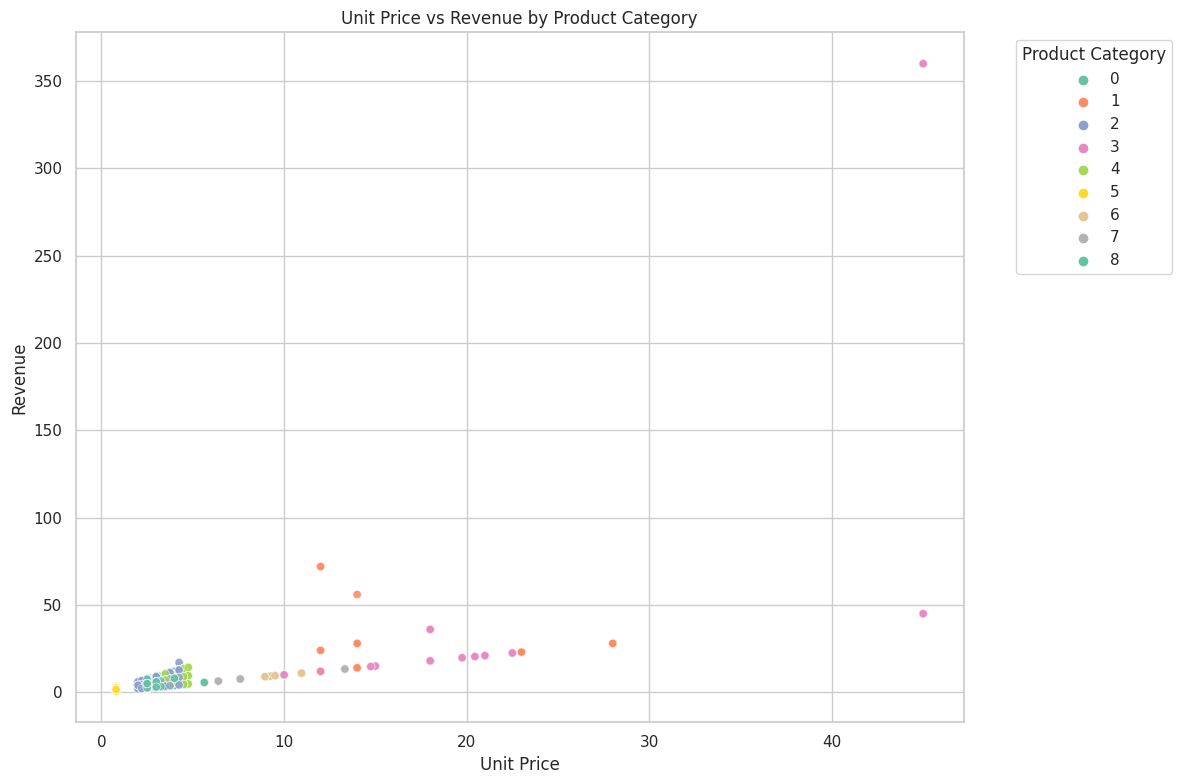

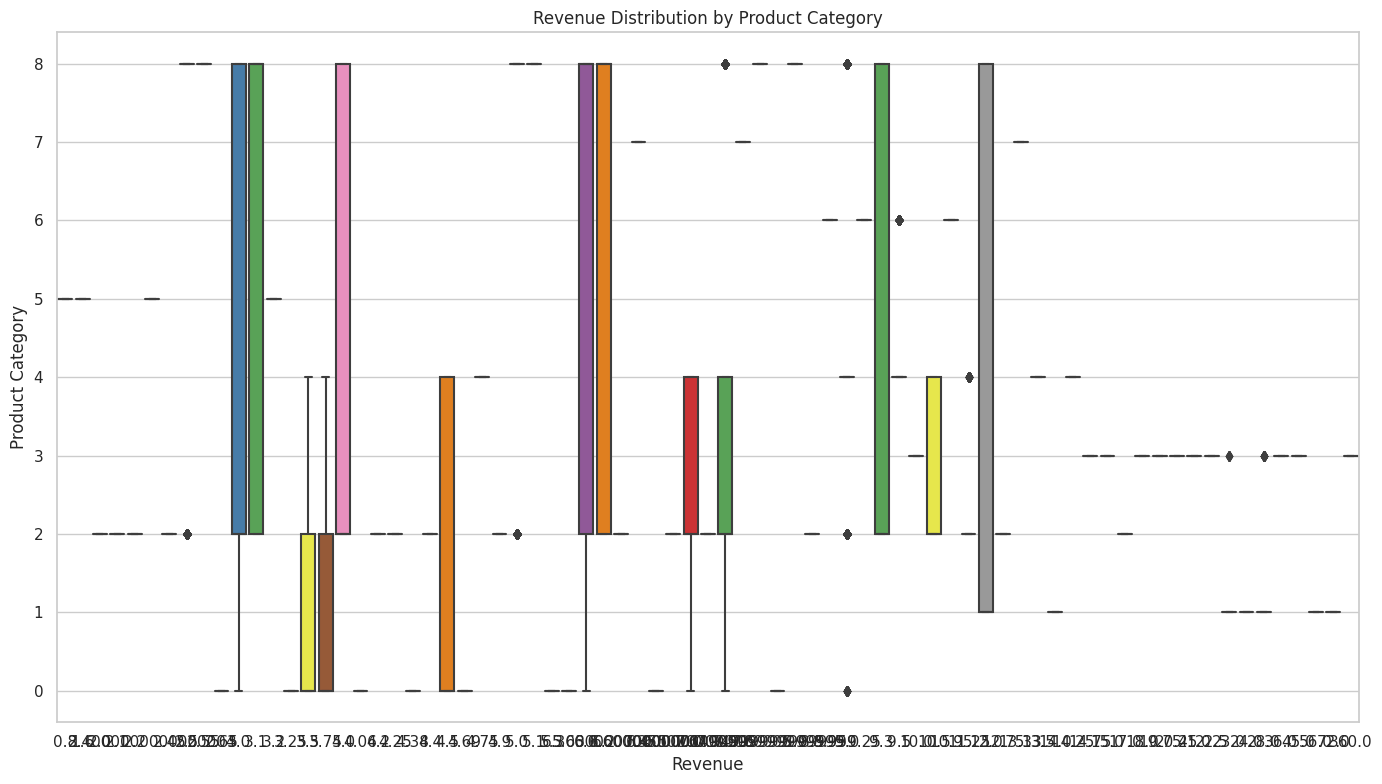

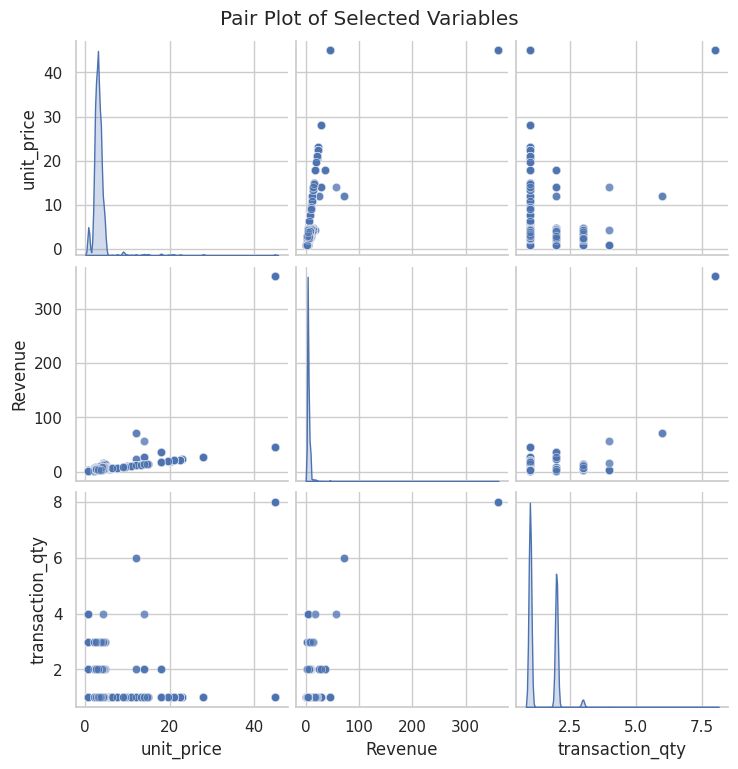

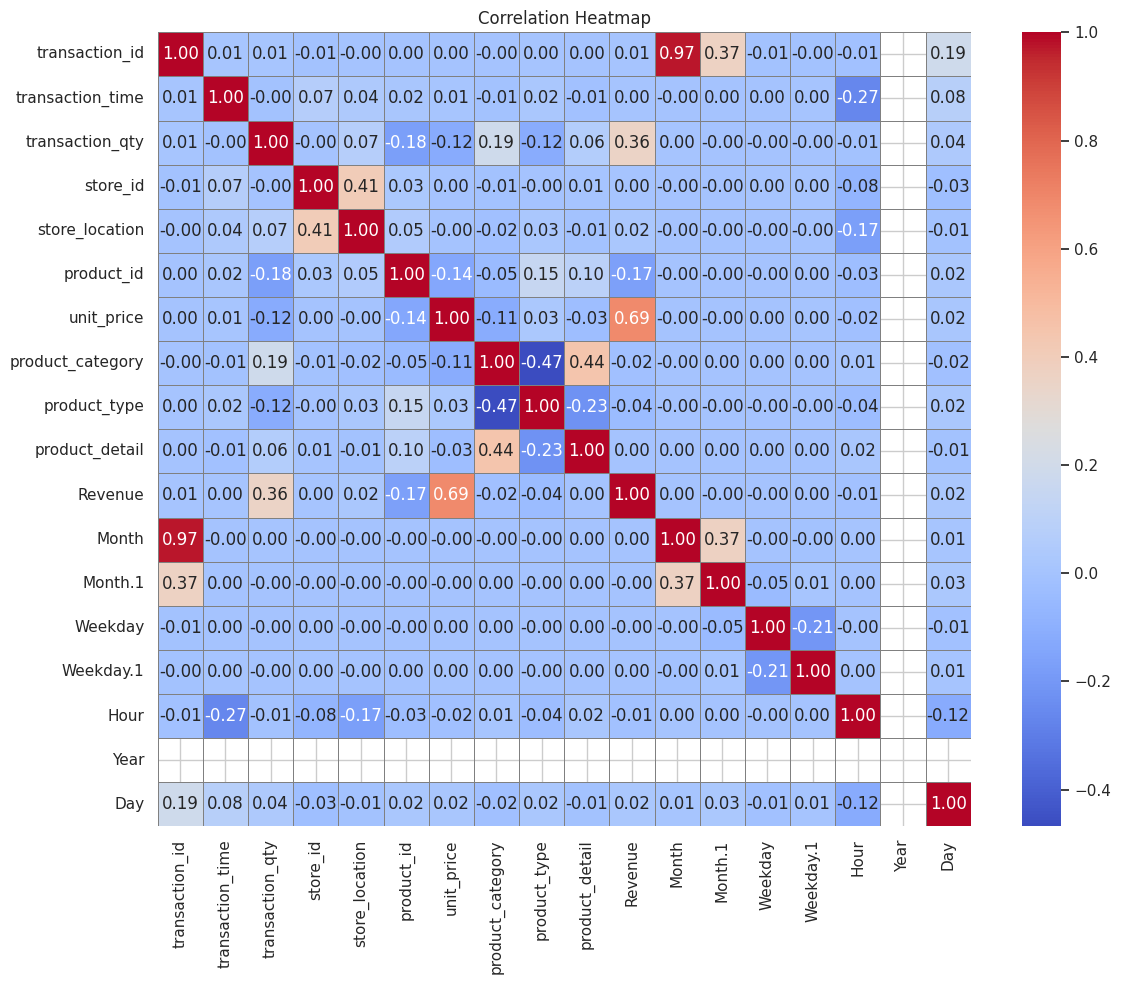

In [348]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_visualizations(df):
    sns.set(style="whitegrid")
  
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df, x='unit_price', y='Revenue', hue='product_category', palette='Set2', alpha=0.7)
    plt.title('Unit Price vs Revenue by Product Category')
    plt.xlabel('Unit Price')
    plt.ylabel('Revenue')
    plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df, y='product_category', x='Revenue', palette='Set1')
    plt.title('Revenue Distribution by Product Category')
    plt.xlabel('Revenue')
    plt.ylabel('Product Category')
    plt.tight_layout()
    plt.show()
    
    pair_vars = ['unit_price', 'Revenue', 'transaction_qty']
    sns.pairplot(df[pair_vars], diag_kind='kde', plot_kws={'alpha':0.5})
    plt.suptitle('Pair Plot of Selected Variables', y=1.02)
    plt.show()
    
    numeric_df = df.select_dtypes(include=['number'])
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='gray')
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()

plot_visualizations(df)

In [382]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time             int64
transaction_qty              int64
store_id                     int64
store_location               int64
product_id                   int64
unit_price                 float64
product_category             int64
product_type                 int64
product_detail               int64
Revenue                    float64
Month                        int32
Month.1                      int64
Weekday                      int32
Weekday.1                    int64
Hour                         int64
Revenue_Category          category
Year                         int32
Day                          int32
dtype: object

In [359]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour,Revenue_Category,Year,Day
0,1,2023-01-01,8180,2,5,2,32,3.0,2,13,32,6.0,1,2,6,3,7,Low,2023,1
1,2,2023-01-01,17816,2,5,2,57,3.1,8,4,71,6.2,1,2,6,3,7,Low,2023,1
2,3,2023-01-01,20026,2,5,2,59,4.5,4,17,20,9.0,1,2,6,3,7,Low,2023,1
3,4,2023-01-01,22754,1,5,2,22,2.0,2,10,60,2.0,1,2,6,3,7,Low,2023,1
4,5,2023-01-01,23681,2,5,2,57,3.1,8,4,71,6.2,1,2,6,3,7,Low,2023,1


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  int64         
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  int64         
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  int64         
 9   product_type      149116 non-null  int64         
 10  product_detail    149116 non-null  int64         
 11  Revenue           149116 non-null  float64       
 12  Month             149116 non-null  int32         
 13  Month.1           149116 non-null  int64         
 14  Week

In [423]:
df['Revenue_Category'] = pd.cut(df['Revenue'], bins=[-float('inf'), 50, 100, 200, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])

In [424]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [425]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,Revenue,Month,Month.1,Weekday,Weekday.1,Hour,Revenue_Category
0,1,2023-01-01,1156,2,5,2,32,3.0,2,13,32,6.0,1,2,7,3,7,Low
1,2,2023-01-01,1256,2,5,2,57,3.1,8,4,71,6.2,1,2,7,3,7,Low
2,3,2023-01-01,1435,2,5,2,59,4.5,4,17,20,9.0,1,2,7,3,7,Low
3,4,2023-01-01,1656,1,5,2,22,2.0,2,10,60,2.0,1,2,7,3,7,Low
4,5,2023-01-01,1731,2,5,2,57,3.1,8,4,71,6.2,1,2,7,3,7,Low


In [426]:
df.dtypes


transaction_id               int64
transaction_date    datetime64[ns]
transaction_time             int64
transaction_qty              int64
store_id                     int64
store_location               int64
product_id                   int64
unit_price                 float64
product_category             int64
product_type                 int64
product_detail               int64
Revenue                    float64
Month                        int64
Month.1                      int64
Weekday                      int64
Weekday.1                    int64
Hour                         int64
Revenue_Category          category
dtype: object

In [427]:
X = df.drop(columns=['Revenue', 'Revenue_Category'])  # Features
y = df['Revenue_Category'] 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [441]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
}

for  name ,clf in classifiers.items():
    
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
  
    print(f"Classifier: {name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Confusion Matrix:")
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")
    #bu kısım başta çalıştı . bazı düzeltmeler yapayım derken bozdum ancak uygun model bu şekilde olacaktı .

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>)